In [1]:
# TODO: implement/test eval functionality for new encoding here, ONE PIECE AT A TIME
# (bring pieces over from eval notebook as needed...)

# leaf category should be the only output currently...START HERE!!

# TODO - use NEW_ENCODING astera dataset and NEW_ENCODING dragom model
    # --> will have to recreate the DRAGON model each time I add a new output...
# TODO - test BATCHES
# TODO - add the rest of the outputs one by one...
# TODO - put each individual predicted output in a column (so we can compute individual accuracies)
# TODO - once all outputs present, convert to a data type prediction (type_seq string?)
#        and evaluate accuracy of the whole prediction


In [2]:
#!ls ~/trained_models

In [3]:
#!ls ~/trained_models/
from pathlib import Path
from datatype_recovery.models.dataset import load_dataset_from_path
from datatype_recovery.models.dataset.encoding import *

import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

dataset_path = Path.home()/'datasets/NEW_ENCODING'
model_path = Path.home()/'trained_models/dragon_5hops_5heads_3linear__NEW_ENCODING.pt'

In [4]:
dataset = load_dataset_from_path(dataset_path)
df = dataset.read_vars_csv()
df

,FunctionStart,Signature,Name_Strip,Type_Strip,LocType_Strip,LocRegName_Strip,LocOffset_Strip,TypeCategory_Strip,TypeSeq_Strip,Name_Debug,...,LeafFloating,LeafSize,PtrLevels,PtrL1,PtrL2,PtrL3,BinaryId,Vartype,IsReturnType_Debug,IsReturnType_Strip
0,1084201,"17,29,53,79,79,87",local_c,int32,stack,NaN,-12.0,BUILTIN,int32,i,...,False,4,LLL,L,L,L,1000,l,False,False
1,1084294,"12,24,44,69,69,77",local_c,int32,stack,NaN,-12.0,BUILTIN,int32,i,...,False,4,LLL,L,L,L,1000,l,False,False
2,1084377,"27,64,89",lVar2,int64,register,rax,0.0,BUILTIN,int64,asset,...,False,0,PLL,P,L,L,1000,l,False,False
3,1084377,"43,56,101",lVar3,int64,register,rax,0.0,BUILTIN,int64,asset_00,...,False,0,PLL,P,L,L,1000,l,False,False
4,1084488,"27,33",iVar1,int32,register,eax,0.0,BUILTIN,int32,iVar1,...,False,4,LLL,L,L,L,1000,l,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,1064939,"12,23",param_1,int64,register,rdi,56.0,BUILTIN,int64,fp,...,False,1,PLL,P,L,L,1008,p,False,False
24675,1064972,17,param_1,uchar,register,dil,56.0,BUILTIN,uchar,timestamp,...,False,1,LLL,L,L,L,1008,p,False,False
24676,1064998,16,param_1,uchar*,register,rdi,56.0,PTR,"PTR,uchar",fmt,...,False,1,PLL,P,L,L,1008,p,False,False
24677,1065701,"295,482",param_9,char*,register,rdi,56.0,PTR,"PTR,char",format,...,False,1,PLL,P,L,L,1008,p,False,False


<Axes: xlabel='LeafCategory'>

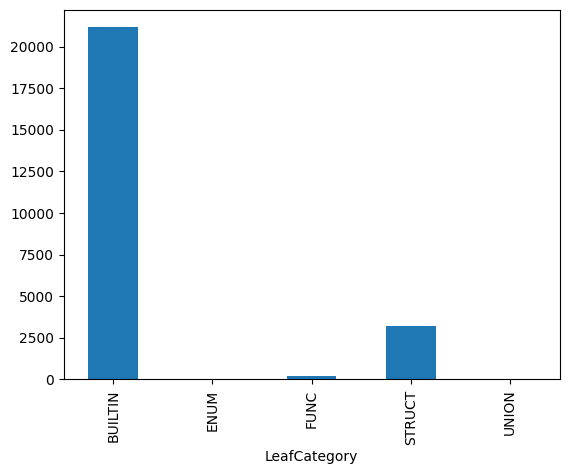

In [5]:
#df.groupby('TypeCategory_Debug').count().FunctionStart.plot(kind='bar')
[x for x in df.columns if 'Leaf' in x]
df.groupby('LeafCategory').count().FunctionStart.plot(kind='bar')

In [6]:
# min_val = df.groupby('LeafCategory').count().FunctionStart.min()
# df.groupby('LeafCategory').sample(n=min_val).groupby('LeafCategory').count().FunctionStart.plot(kind='bar')
[x for x in df.columns]

['FunctionStart',
 'Signature',
 'Name_Strip',
 'Type_Strip',
 'LocType_Strip',
 'LocRegName_Strip',
 'LocOffset_Strip',
 'TypeCategory_Strip',
 'TypeSeq_Strip',
 'Name_Debug',
 'Type_Debug',
 'LocType_Debug',
 'LocRegName_Debug',
 'LocOffset_Debug',
 'TypeCategory_Debug',
 'TypeSeq_Debug',
 'HasDWARF',
 'TypeJson_Debug',
 'LeafCategory',
 'LeafSigned',
 'LeafFloating',
 'LeafSize',
 'PtrLevels',
 'PtrL1',
 'PtrL2',
 'PtrL3',
 'BinaryId',
 'Vartype',
 'IsReturnType_Debug',
 'IsReturnType_Strip']

In [7]:
from datatype_recovery.models.eval import make_predictions_on_dataset

model_pred = make_predictions_on_dataset(model_path, 'cuda:0', dataset)

DragonModel(
  (gat_layers): ModuleList(
    (0): GATConv(86, 128, heads=5)
    (1-4): 4 x GATConv(640, 128, heads=5)
  )
  (shared_linear_layers): Sequential(
    (0): Linear(in_features=640, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
  )
  (ptr_l1_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l2_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (ptr_l3_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=3, bias=True)
  )
  (leaf_category_head): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True

100%|██████████| 151/151 [00:36<00:00,  4.13it/s]


In [8]:
model_pred
# TODO: implement training/loss (BCEWithLogitsLoss for binary outputs)
# TODO - train the model as-is and see how we do...
# TODO - update model to feed some outputs into other task-specific layers (see diagram)
# TODO - retrain with bigger dataset (w/e my custom training dataset was before?)
# TODO - balance by leaf category? or by ptr levels?
# TODO - overall accuracy? raw vs. corrected?
# TODO - individual classifiers? (leaf category, ptrl1, floating, signed...)
# TODO - accuracy on PTR,STRUCT true types?
#           -> locals vs. params? non-unique? register? ...
# TODO - eval on benchmarks vs. others (DIRTY, OSPREY, StateFormer...?)
# TODO - ok, what other experiments do we need to run to publish?
# ---> evaluate scalability?

,BinaryId,FunctionStart,Signature,Vartype,RawPred,Pred,PredPtrLevels,PredPtrL1,PredPtrL2,PredPtrL3,PredLeafCategory,PredLeafSigned,PredLeafFloating,PredLeafSize
0,1000,1084201,"17,29,53,79,79,87",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
1,1000,1084201,43,p,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
2,1000,1084294,"12,24,44,69,69,77",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
3,1000,1084377,"27,64,89",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
4,1000,1084377,"43,56,101",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24674,1008,1065701,"332,344,416,450,...",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
24675,1008,1065701,"295,482",p,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
24676,1008,1066231,57,l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
24677,1008,1066231,"263,275,335,367",l,"ARR,PTR,ARR,uint64","ARR,PTR,ARR,uint64",APA,A,P,A,BUILTIN,False,False,8
